In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split

Question 15: Préparation de la matrice de données + Séparation des données en un jeu d'entrainement

In [3]:
# Chargement des données
df = pd.read_csv("annonces_ile_de_france_final.csv")

X = df.drop(columns=["Prix"])
y = df["Prix"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

Question 16: Modèle LinearRegression sur nos données

In [4]:
from sklearn.linear_model import LinearRegression  

#Création du modèle
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Evaluation
score_LR = lr_model.score(X_test, y_test)
print("Score : ", score_LR)

Score :  0.1428190449054365


Question 17: Evaluation de l'impact du pré-traitrement des données

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

# Pipeline avec MinMaxScaler (normalisation)
pipe_norm = make_pipeline(MinMaxScaler(), LinearRegression())
pipe_norm.fit(X_train, y_train)
score_LR_norm = pipe_norm.score(X_test, y_test)
print("Score avec normalisation (MinMaxScaler) :", score_LR_norm)

# Pipeline avec StandardScaler (standardisation)
pipe_std = make_pipeline(StandardScaler(), LinearRegression())
pipe_std.fit(X_train, y_train)
score_LR_std = pipe_std.score(X_test, y_test)
print("Score avec standardisation (StandardScaler) :", score_LR_std)

Score avec normalisation (MinMaxScaler) : 0.14281904490543662
Score avec standardisation (StandardScaler) : 0.1428190449054365


Question 18: Remplissage du tableau 

In [6]:
#méthode               r²
#lr                    0.1428190449054365
#Normalisation + LR    0.14281904490543662
#Standardisation + LR  0.1428190449054365

#On voit que la normalisation et la standardisation n'ont pas d'impact siginificatif sur le modèle de régression linéaire.

Question 19: Evaluation du modèle Arbre de Décision

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Création et entrainement du modèle
tree_model = DecisionTreeRegressor(max_depth=4)
tree_model.fit(X_train, y_train)

score_tree = tree_model.score(X_test, y_test)
print("Score avec (Arbre de régression, sans prétraitement) :", score_tree)


Score avec (Arbre de régression, sans prétraitement) : 0.16475970304495902


In [8]:
#Test avec MinMAxScaler
pipe_tree_norm = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth=4))
pipe_tree_norm.fit(X_train, y_train)
score_tree_norm = pipe_tree_norm.score(X_test, y_test)
print("Score avec (Arbre de régression, avec normalisation) :", score_tree_norm)

#Test avec StandardScaler
pipe_tree_std = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=4))
pipe_tree_std.fit(X_train, y_train)
score_tree_std = pipe_tree_std.score(X_test, y_test)
print("Score avec (Arbre de régression, avec standardisation) :", score_tree_std)

Score avec (Arbre de régression, avec normalisation) : 0.16475970304495902
Score avec (Arbre de régression, avec standardisation) : 0.16475970304495902


In [ ]:
#On constate que dans les 3 cas, on a un score de 0.16475970304495902.


#Pour ce qui est du score, on a un score de 0.16. On voit qu'il n'est du coup pas très adapté car n'explique que 16% de la variance du prix.
#Peut etre a cause du fait que le prix dépend plusieurs facteurs.

Question 19: Incrémentation de max_depth() a +1 et +2

In [10]:
#Max_depth = 5

tree_5 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_5.fit(X_train, y_train)
score_tree_5 = tree_5.score(X_test, y_test)
print("Score avec (max_depth=5, sans prétraitement) :", score_tree_5)

#Max_depth = 6

tree_6 = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_6.fit(X_train, y_train)
score_tree_6 = tree_6.score(X_test, y_test)
print("Score avec (max_depth=6, sans prétraitement) :", score_tree_6)


Score avec (max_depth=5, sans prétraitement) : 0.18205219920516413
Score avec (max_depth=6, sans prétraitement) : 0.15548365301894873


In [11]:
#On constate que la meilleur profondeur est à 5.
#Cependant, on passe (pour "sans prétraitement") de  0.164 à 0.182
#Ce n'est pas trés significatif on va donc rester à max_depth=4

Question 20: Remplissage du tableau

In [12]:
#méthode               r²
#AD                    0.16475970304495902
#Normalisation + AD    0.16475970304495902
#Standardisation + AD  0.16475970304495902

Question 21: Evaluation avec le modèle KNeighborsRegressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor

#Sans prétraitement
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
score_knn_4 = knn.score(X_test, y_test)
print("Score avec (KNN = 4, sans prétraitement) :", score_knn_4)  

#Avec MinMaxScaler
pipe_knn_norm = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=4))
pipe_knn_norm.fit(X_train, y_train)
score_knn_norm = pipe_knn_norm.score(X_test, y_test)
print("Score avec (KNN = 4, avec normalisation) :", score_knn_norm)

#Avec StandardScaler
pipe_knn_std = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=4))
pipe_knn_std.fit(X_train, y_train)
score_knn_std = pipe_knn_std.score(X_test, y_test)
print("Score avec (KNN = 4, avec standardisation) :", score_knn_std)

Score avec (KNN = 4, sans prétraitement) : -0.07567467167697495
Score avec (KNN = 4, avec normalisation) : 0.06757847364523739
Score avec (KNN = 4, avec standardisation) : 0.17744692062798662


In [ ]:
#Avec le prétraitement, on observe une nette amélioration du score par rapport au modèle sans prétraitement.
#Cela s'explique par le fait que KNN est très sensible à l’échelle des variables, car il repose sur des calculs de distance.
#Le score reste cependant assez éloigné de 1, ce qui montre que le modèle n’est pas encore très adapté à nos données.

Question 21: Evaluation avec le modele KNeighbors, k = 5

In [15]:
#Sans prétraitement
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
score_knn_5 = knn.score(X_test, y_test)
print("Score avec (KNN = 5, sans prétraitement) :", score_knn_5)  

#Avec MinMaxScaler
pipe_knn_norm = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=5))
pipe_knn_norm.fit(X_train, y_train)
score_knn_norm = pipe_knn_norm.score(X_test, y_test)
print("Score avec (KNN = 5, avec normalisation) :", score_knn_norm)

#Avec StandardScaler
pipe_knn_std = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
pipe_knn_std.fit(X_train, y_train)
score_knn_std = pipe_knn_std.score(X_test, y_test)
print("Score avec (KNN = 5, avec standardisation) :", score_knn_std)

Score avec (KNN = 5, sans prétraitement) : -0.1344987338627115
Score avec (KNN = 5, avec normalisation) : 0.1037501598755558
Score avec (KNN = 5, avec standardisation) : 0.1346777152075025


In [16]:
#On va rester avec n_neighbors=4 car c'est celui qui donne le meilleur score avec la normalisation.

Question 22: Remplissage du tableau

In [17]:
#méthode                r²
#KNN                    -0.07567467167697495
#Normalisation + KNN    0.06757847364523739
#Standardisation + KNN  0.17744692062798662

Question 23: Remplissage du tableau

In [18]:
#méthode               r²
#LR                    0.1428190449054365   (Sans prétraitement)
#AD                    0.16475970304495902  (Sans prétraitement)
#KNN                   0.17744692062798662  (Standardisation)


#On voit que KNN avec standardisation est la méthode M. 

Question 24: Représentation des résultats

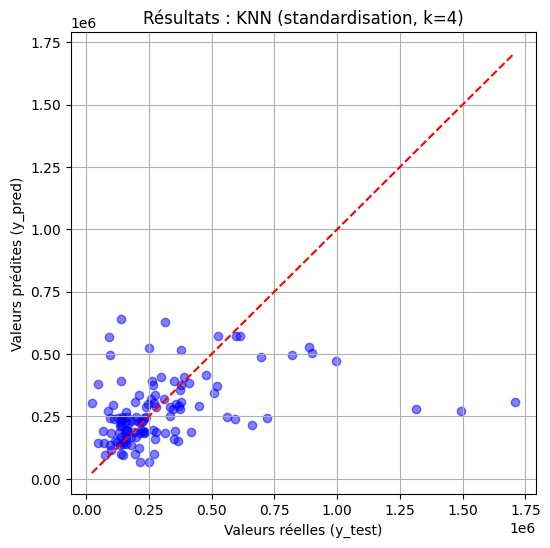

In [80]:
import matplotlib.pyplot as plt


pipe_knn_std = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=4))
pipe_knn_std.fit(X_train, y_train)


y_pred = pipe_knn_std.predict(X_test)


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")
plt.title("Résultats : KNN (standardisation, k=4)")
plt.grid()
plt.show()


In [20]:
#Le nuage de points suit globalement la diagonale, ce qui montre que les prédictions sont cohérentes pour beaucoup d’annonces. 
#Mais quelques biens très chers créent de gros écarts, ce qui limite la précision du modèle

#Non, il n'est pas suffisant pour construire un vrai modèle car le score ne dépassent pas 0.20.

Question 25: Réduction du nombre de composants



In [36]:
from sklearn.decomposition import PCA

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA sur données standardisées
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Variance expliquée par les 2 composantes :", sum(pca.explained_variance_ratio_))

Variance expliquée par les 2 composantes : 0.3470260360637304


In [ ]:
#La modélisation avec 2 composantes principales n'est pas satisfaisante car elle ne capte que 34,7% de la variance totale des données.

Question 26: Application de la réduction de composant au modèle

In [77]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_pca, y_train)
score = knn.score(X_test_pca, y_test)

print("Score R² après PCA sur données standardisées :", score)

Score R² après PCA sur données standardisées : -0.05195680095581667


In [ ]:
#On constate une grande baisse du score avec PCA.
print("Variance expliquée par les 2 composantes :", sum(pca.explained_variance_ratio_))

#Ce qui confirme ce qu'on a dit au dessus

Variance expliquée par les 2 composantes : 0.3470260360637304


Question 27: Etablissement de la matrice de corrélation

In [78]:
corr_df = df.corr(method ="pearson")

corr_df.style.background_gradient(cmap="coolwarm")

,Surface,NbrPieces,NbrChambres,NbrSdb,Prix,Type_Appartement,Type_Maison,DPE_A (< 50),DPE_B (51 à 90),DPE_C (91 à 150),DPE_D (151 à 230),DPE_E (231 à 330),DPE_F (331 à 450),DPE_Vierge,latitude,longitude
Surface,1.000000,0.121460,0.527065,0.482763,0.364676,-0.476485,0.476485,0.014347,-0.050721,0.029742,0.051194,-0.115461,-0.026047,0.042137,0.025844,0.063529
NbrPieces,0.121460,1.000000,0.488325,0.443966,0.101126,-0.107405,0.107405,-0.003527,-0.021720,-0.011541,-0.023352,-0.054025,-0.026637,0.067926,0.030736,0.017423
NbrChambres,0.527065,0.488325,1.000000,0.616109,0.241675,-0.528162,0.528162,0.044953,-0.053803,0.076581,0.090764,-0.072590,-0.015425,-0.037683,0.001243,0.079031
NbrSdb,0.482763,0.443966,0.616109,1.000000,0.265600,-0.309713,0.309713,0.029093,-0.018373,-0.046826,-0.050498,-0.063095,-0.014018,0.095466,0.040666,0.016615
Prix,0.364676,0.101126,0.241675,0.265600,1.000000,-0.119030,0.119030,0.048294,-0.009413,0.027480,0.152276,-0.018755,0.045307,-0.121534,0.058924,-0.015712
Type_Appartement,-0.476485,-0.107405,-0.528162,-0.309713,-0.119030,1.000000,-1.000000,-0.016310,0.024201,-0.082372,-0.052858,0.071464,0.004501,0.022702,0.008389,-0.136081
Type_Maison,0.476485,0.107405,0.528162,0.309713,0.119030,-1.000000,1.000000,0.016310,-0.024201,0.082372,0.052858,-0.071464,-0.004501,-0.022702,-0.008389,0.136081
DPE_A (< 50),0.014347,-0.003527,0.044953,0.029093,0.048294,-0.016310,0.016310,1.000000,-0.005942,-0.011642,-0.017898,-0.016438,-0.009927,-0.130185,0.019851,-0.024507
DPE_B (51 à 90),-0.050721,-0.021720,-0.053803,-0.018373,-0.009413,0.024201,-0.024201,-0.005942,1.000000,-0.016499,-0.025365,-0.023296,-0.014069,-0.184496,-0.114023,0.044709
DPE_C (91 à 150),0.029742,-0.011541,0.076581,-0.046826,0.027480,-0.082372,0.082372,-0.011642,-0.016499,1.000000,-0.049699,-0.045644,-0.027565,-0.361485,-0.011261,0.058272


Question 28

In [30]:
#L'attribut qui donne la connaissance nous renseigne le plus sur le prix est la surface avec 0.36

Question 29: Modification avec les 5 meilleurs attributs

In [76]:
#Nouveau jeu de données

Xnew = df[["Surface", "NbrSdb", "NbrChambres", "Type_Appartement", "Type_Maison"]] 
ynew = df["Prix"]


# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.25, random_state=49)

# KNN + Standardisation (méthode M)
#Avec StandardScaler
pipe_knn_std = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=4))
pipe_knn_std.fit(X_train, y_train)
score_knn_std = pipe_knn_std.score(X_test, y_test)
print("Score avec (KNN = 4, avec standardisation) :", score_knn_std)

Score avec (KNN = 4, avec standardisation) : 0.1013571747272789


In [ ]:
#En ne gardant que les 5 attributs les plus corrélés au prix (Surface, NbrSdb, NbrChambres, Type_Appartement et Type_Maison), le score R² passe de 0.1774 à 0.1014.
#On constate une baisse modérée, ce qui montre que les autres attributs, bien que moins corrélés individuellement, apportaient une certaine complémentarité.